<a href="https://colab.research.google.com/github/kny2609/Bigdata/blob/master/smartcar_dnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# 필요한 라이브러리 임포트
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from time import time
from tensorflow.python.keras.callbacks import TensorBoard
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc
from keras.utils import to_categorical
from keras.models import load_model

In [20]:
# 구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# 데이터셋 로드
df = pd.read_csv('/content/drive/My Drive/Tensorflow_works/data/CarDrivingIncidentInfo.csv')
df

,wea,temp,hum,arrCar,timeSlot,acciArea,drvCond,innCond,carSpd,steeAng,acciPos
0,0,1,1,1,1,2,1,2,2,1,2
1,1,0,0,0,0,0,2,0,0,0,0
2,1,0,0,1,0,1,2,0,1,1,0
3,0,0,0,0,0,1,2,1,1,0,0
4,0,0,0,0,0,0,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
199995,2,0,0,1,1,2,1,1,0,0,1
199996,0,1,1,1,0,1,0,0,2,1,0
199997,1,0,2,0,1,2,2,1,2,0,2
199998,0,1,0,2,1,2,0,0,0,0,0


In [22]:
# 데이터 전처리
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [23]:
# DNN 모델 구성 및 요약 정보 출력
model = Sequential([
                    Dense(10, input_dim=10, activation='relu'),
                    Dense(20, activation='relu'),
                    Dropout(0.25),
                    Dense(10, activation='relu'),
                    Dense(3, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_13 (Dense)             (None, 20)                220       
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 33        
Total params: 573
Trainable params: 573
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# DNN 모델 학습
hist = model.fit(X_train,
                 Y_train,
                 batch_size=2000,
                 epochs=50,
                 validation_data=(X_test, Y_test))

In [25]:
# 모델을 학습 결과
score = model.evaluate(X_test, Y_test, verbose=0)
print(model.metrics_names)
print(score)

['loss', 'acc']
[0.0002442666154820472, 0.9999750256538391]


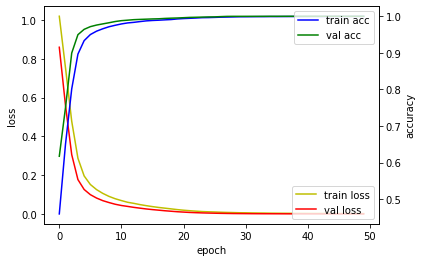

In [26]:
# DNN 모델의 학습 결과 시각화
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')

loss_ax.set_ylabel('loss')
loss_ax.legend(loc='lower right')

acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.show()

In [27]:
# 모델 저장
model.save('/content/drive/My Drive/Tensorflow_works/smartcar_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Tensorflow_works/smartcar_model/assets
